# X-ray Image Classification

Data Source: https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [ ]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# setting the training data directory
DataDir = r"/content/drive/MyDrive/X-Ray Image Classification/chest_xray/train/"

In [ ]:
# intiallizing the category of classification
CATEGORIES = ["NORMAL", "PNEUMONIA"]

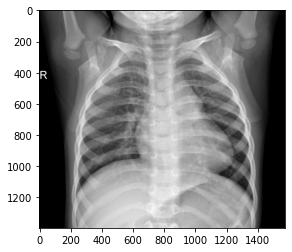

In [ ]:
# converting the images into grayscale
for i in CATEGORIES:
    path=os.path.join(DataDir,i)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

In [ ]:
# intializing the size of the image so that every image should be in same dimension
img_size=100

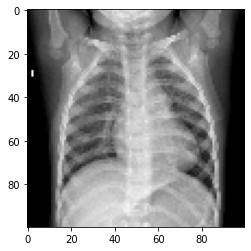

In [ ]:
# image after resize and gray scale
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array,cmap='gray')
plt.show()

In [ ]:
training_data=[]

In [ ]:
# defining the function for training data according to the categories converting the images into gray scale with resizing the image into 100 x 100 
# converting it into numpy arrays
def create_training_data():
    for i in CATEGORIES:

        path=os.path.join(DataDir,i)
        class_num=CATEGORIES.index(i)

        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
            
            except Exception as e:
                pass

In [ ]:
create_training_data()

In [ ]:
print(len(training_data))

5226


In [ ]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample)

[array([[133, 120, 103, ...,  74,  70,  68],
       [134, 125,  94, ...,  79,  76,  67],
       [113, 111,  90, ...,  80,  67,  67],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8), 1]
[array([[ 52,  44,  41, ..., 171, 163, 155],
       [ 47,  37,  37, ..., 162, 146, 188],
       [ 39,  35,  45, ..., 161, 154, 178],
       ...,
       [ 19,  19,  17, ...,  52,   3,   7],
       [ 19,  18,  17, ...,  50,   2,   7],
       [ 18,  18,  16, ...,  52,   1,   3]], dtype=uint8), 1]
[array([[16, 46, 48, ..., 50,  3,  4],
       [41, 47, 50, ..., 38, 34,  0],
       [37, 44, 50, ..., 46, 37, 21],
       ...,
       [28, 24, 25, ..., 38, 21, 26],
       [28, 25, 25, ..., 22, 21, 26],
       [26, 25, 25, ..., 25, 20, 25]], dtype=uint8), 1]
[array([[158, 113, 115, ...,  27,  41,  46],
       [ 81, 130, 115, ...,  54,  59,  68],
       [ 65, 153, 120, ...,  66,  74,  76],
       ...,
      

In [ ]:
X=[]
y=[]

In [ ]:
# spliting the features and labels
for features,label in training_data:
    X.append(features)
    y.append(label)

In [ ]:
print(X[0].reshape(-1,img_size,img_size,1))

[[[[133]
   [120]
   [103]
   ...
   [ 74]
   [ 70]
   [ 68]]

  [[134]
   [125]
   [ 94]
   ...
   [ 79]
   [ 76]
   [ 67]]

  [[113]
   [111]
   [ 90]
   ...
   [ 80]
   [ 67]
   [ 67]]

  ...

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]]]


In [ ]:
y = np.array(y)

In [ ]:
# reshapping the features for making it compatible with tensorflow
X = np.array(X).reshape(-1,img_size,img_size,1)

In [ ]:
# as we do for training data similiarly doing with validation data
validation_data=[]
DataDir_val= r"/content/drive/MyDrive/X-Ray Image Classification/chest_xray/val"

In [ ]:
def create_validating_data():
    for i in CATEGORIES:

        path=os.path.join(DataDir_val,i)
        class_num=CATEGORIES.index(i)

        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(img_size,img_size))
                validation_data.append([new_array,class_num])
            
            except Exception as e:
                pass

In [ ]:
create_validating_data()
print(len(validation_data))

16


In [ ]:
import random
random.shuffle(validation_data)
for sample in validation_data[:10]:
    print(sample)

[array([[  8,  96,  46, ...,  19,  19,  14],
       [  1, 100,  80, ...,  26,  23,  16],
       [ 77,  73, 112, ...,  24,  20,  16],
       ...,
       [  0,   3,   7, ...,   0,   0,   0],
       [  0,   0,   6, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0]], dtype=uint8), 0]
[array([[17, 19, 26, ..., 27, 15, 17],
       [18, 23, 33, ..., 53, 43, 22],
       [19, 27, 32, ..., 51, 35, 28],
       ...,
       [ 6,  4,  5, ...,  0,  2,  3],
       [ 6,  4,  5, ...,  0,  2,  3],
       [ 5,  6,  3, ...,  0,  2,  0]], dtype=uint8), 1]
[array([[0, 1, 3, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 1]
[array([[  2, 107,  75, ...,   0,   3,  10],
       [ 59, 105,  51, ...,   2,   0,  21],
       [122,  96,  15, ...,  11,   8,  35],
       ...,
       [  0,   0,  18, ...,   0,   0,   0],
       [  0,   0,  13, ...,   0,  

In [ ]:
X_val=[]
y_val=[]

In [ ]:
for features,label in validation_data:
    X_val.append(features)
    y_val.append(label)

In [ ]:
y_val = np.array(y_val)
X_val=np.array(X_val).reshape(-1,img_size,img_size,1)

In [ ]:
# importing the library for training the model and adding the neural network layers
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
import pickle
from tensorflow.keras.layers import Conv2D,MaxPooling2D

In [ ]:
# Pixels value ranges from 0 to 255, 0 means black, 255 means white....
# In order to scale it down to a scale of 0 to 1, we are performing this step
X = X/255.0
x_val = X_val/255.0

In [ ]:
X.shape

(5226, 100, 100, 1)

In [ ]:
x_val.shape

(16, 100, 100, 1)

In [ ]:
# intializing the neural network layer for training the model
model= Sequential()

model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Flatten())
model.add(Dense(64))

model.add(Dropout(.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        640       
                                                                 
 activation (Activation)     (None, 98, 98, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 128)       73856     
                                                                 
 activation_1 (Activation)   (None, 47, 47, 128)       0         
                                                        

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# fittting the model with 10 epochs and using the validation data we have created
model.fit(X,y,batch_size=4,epochs=10,validation_data=(x_val, y_val))

Epoch 1/10
1307/1307 [==============================] - 21s 7ms/step - loss: 0.2525 - accuracy: 0.8999 - val_loss: 0.5690 - val_accuracy: 0.7500
Epoch 2/10
1307/1307 [==============================] - 9s 7ms/step - loss: 0.1307 - accuracy: 0.9550 - val_loss: 0.1977 - val_accuracy: 0.8750
Epoch 3/10
1307/1307 [==============================] - 9s 7ms/step - loss: 0.1239 - accuracy: 0.9573 - val_loss: 0.3897 - val_accuracy: 0.7500
Epoch 4/10
1307/1307 [==============================] - 9s 7ms/step - loss: 0.1047 - accuracy: 0.9615 - val_loss: 0.2405 - val_accuracy: 0.8750
Epoch 5/10
1307/1307 [==============================] - 8s 6ms/step - loss: 0.1027 - accuracy: 0.9615 - val_loss: 0.2510 - val_accuracy: 0.8750
Epoch 6/10
1307/1307 [==============================] - 9s 7ms/step - loss: 0.0867 - accuracy: 0.9705 - val_loss: 0.0797 - val_accuracy: 1.0000
Epoch 7/10
1307/1307 [==============================] - 9s 7ms/step - loss: 0.0749 - accuracy: 0.9709 - val_loss: 0.0388 - val_accuracy

In [ ]:
# saving the model
model.save(r"/content/drive/MyDrive/X-Ray Image Classification/chest_xray/model_10.h5")

In [ ]:
# importing the library for testing the model
import cv2 
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import load_model

In [ ]:
CATEGORIES = ["NORMAL", "PNEUMONIA"]

In [ ]:
# function for preparing the image for predicting the class
def prepare(image):
    img_size=100
    #img_array=cv2.imread(image,cv2.IMREAD_GRAYSCALE)
    img=tf.keras.preprocessing.image.load_img(image, color_mode='grayscale', target_size=(img_size,img_size))
    new_array=tf.keras.preprocessing.image.img_to_array(img)

    return new_array.reshape(-1,img_size,img_size,1)

In [ ]:
model = tf.keras.models.load_model(r"/content/drive/MyDrive/X-Ray Image Classification/chest_xray/model_10.h5")

In [ ]:
image = r'/content/drive/MyDrive/X-Ray Image Classification/chest_xray/test/NORMAL/NORMAL2-IM-0110-0001.jpeg'

In [ ]:
prediction=model.predict([prepare(image)/255.0])
print(prediction)
print(round(prediction[0][0]))
print(CATEGORIES[int(round(prediction[0][0]))])

1/1 [==============================] - 7s 7s/step
[[0.13248739]]
0
NORMAL


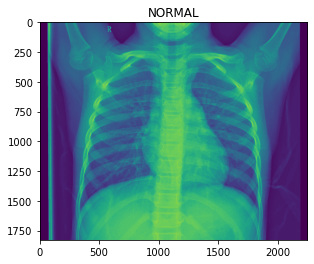

In [ ]:
img=mpimg.imread(image)
imgplot=plt.imshow(img)
plt.title(CATEGORIES[int(prediction[0][0])])
plt.show()

In [ ]:
# importing necessary libraries
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

# set the path for test data
test_dir = "/content/drive/MyDrive/X-Ray Image Classification/chest_xray/test"

# define categories
CATEGORIES = ["NORMAL", "PNEUMONIA"]

# set image size
img_size = 100

# load the saved model
model = load_model('/content/drive/MyDrive/X-Ray Image Classification/chest_xray/model_10.h5')

# initialize lists for storing test data
X_test = []
y_test = []

# loop through the test data directory and extract the images and their labels
for category in CATEGORIES:
    path = os.path.join(test_dir, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (img_size, img_size))
            X_test.append(new_array)
            y_test.append(class_num)
        except Exception as e:
            pass

# convert test data to numpy arrays
X_test = np.array(X_test).reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

# normalize test data
X_test = X_test / 255.0

# calculate test accuracy
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

# print test accuracy
print('Test accuracy:', test_acc)


20/20 - 1s - loss: 1.5536 - accuracy: 0.7404 - 804ms/epoch - 40ms/step
Test accuracy: 0.7403846383094788


#### Just with 10 epochs, we are able to achieve a 75% accuracy

# Vision Transformers

In [ ]:
pip install vit-keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=f7faf54fc6cd5cb9803126162501e79ed8a37d405441ad3c73adcf64a31bc778
  Stored in directory: /root/.cache/pip/wheels/19/09/72/3eb74d236bb48bd0f3c6c3c83e4e0c5bbfcbcad7c6c3539db8
Successfully built validators


In [ ]:
pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.3 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
#from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import ResNet50
#from vit_keras import vit, visualize
#import vit_keras


# Set the seed value
seed_value = 42
os.environ['PYTHONHASHSEED'] = str(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Set the image size
IMG_SIZE = 224

# Set the batch size
BATCH_SIZE = 16

# Load the dataset
data_dir = "/content/drive/MyDrive/X-Ray Image Classification/chest_xray/"
train_dir = os.path.join(data_dir, "train/")
test_dir = os.path.join(data_dir, "test/")

def load_dataset():
    train_data = []
    test_data = []
    for category in os.listdir(train_dir):
        path = os.path.join(train_dir, category)
        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            if category == "NORMAL":
                label = 0
            else:
                label = 1
            train_data.append([img_path, label])
    
    for category in os.listdir(test_dir):
        path = os.path.join(test_dir, category)
        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            if category == "NORMAL":
                label = 0
            else:
                label = 1
            test_data.append([img_path, label])

    train_df = pd.DataFrame(train_data, columns=['Image', 'Label'])
    test_df = pd.DataFrame(test_data, columns=['Image', 'Label'])

    return train_df, test_df

train_df, test_df = load_dataset()

# Encode the labels
le = LabelEncoder()
train_df['Label'] = le.fit_transform(train_df['Label'])
test_df['Label'] = le.transform(test_df['Label'])

train_df['Label'] = train_df['Label'].astype(str)

test_df['Label'] = test_df['Label'].astype(str)

# Split the dataset into train, validation and test sets
train_df, val_df = train_test_split(train_df, test_size=0.1, random_state=seed_value)
val_df['Label'] = val_df['Label'].astype(str)
# Create the image data generators
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(train_df, 
                                                    x_col='Image', 
                                                    y_col='Label', 
                                                    target_size=(IMG_SIZE, IMG_SIZE), 
                                                    batch_size=BATCH_SIZE, 
                                                    class_mode='binary')

val_generator = val_datagen.flow_from_dataframe(val_df, 
                                                x_col='Image', 
                                                y_col='Label', 
                                                target_size=(IMG_SIZE, IMG_SIZE), 
                                                batch_size=BATCH_SIZE, 
                                                class_mode='binary')

test_generator = test_datagen.flow_from_dataframe(test_df, 
                                                  x_col='Image', 
                                                  y_col='Label', 
                                                  target_size=(IMG_SIZE, IMG_SIZE), 
                                                batch_size=BATCH_SIZE, 
                                                class_mode='binary')


Found 4703 validated image filenames belonging to 2 classes.
Found 523 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


In [ ]:
pip install vit-keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=162b5ba6f110b85b16d342f93c918eb98cd683690e6560b901e0aa53553b2d45
  Stored in directory: /root/.cache/pip/wheels/19/09/72/3eb74d236bb48bd0f3c6c3c83e4e0c5bbfcbcad7c6c3539db8
Successfully built validators


In [ ]:
# importing required libraries
import tensorflow as tf
# from tensorflow.keras.applications import ViT
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from vit_keras import vit

# load pre-trained Vision Transformer model
vit_model = vit.vit_b16(
    image_size=224,
    activation='relu',
    pretrained=True,
    include_top=True,
    pretrained_top=False,
    classes=2,
)

# freeze the pre-trained layers
for layer in vit_model.layers:
    layer.trainable = False

# add new trainable layers
model = Sequential()
model.add(vit_model)
'''
model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))
'''
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vit-b16 (Functional)        (None, 2)                 85800194  
                                                                 
 flatten_1 (Flatten)         (None, 2)                 0         
                                                                 
 dense_2 (Dense)             (None, 256)               768       
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 85,842,179
Trainable params: 41,985
Non-

In [ ]:

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model
model.fit(train_generator, epochs=100, validation_data=val_generator)

# evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

# saving the model
model.save(r"/content/drive/MyDrive/X-Ray Image Classification/chest_xray/model_vit_10.h5")

Epoch 1/100
294/294 [==============================] - 165s 496ms/step - loss: 0.5660 - accuracy: 0.7423 - val_loss: 0.5645 - val_accuracy: 0.7266
Epoch 2/100
294/294 [==============================] - 140s 474ms/step - loss: 0.5598 - accuracy: 0.7453 - val_loss: 0.5672 - val_accuracy: 0.7266
Epoch 3/100
294/294 [==============================] - 141s 479ms/step - loss: 0.5621 - accuracy: 0.7453 - val_loss: 0.5679 - val_accuracy: 0.7266
Epoch 4/100
294/294 [==============================] - 144s 489ms/step - loss: 0.5616 - accuracy: 0.7453 - val_loss: 0.5765 - val_accuracy: 0.7266
Epoch 5/100
294/294 [==============================] - 142s 484ms/step - loss: 0.5574 - accuracy: 0.7453 - val_loss: 0.5681 - val_accuracy: 0.7266
Epoch 6/100
294/294 [==============================] - 143s 488ms/step - loss: 0.5592 - accuracy: 0.7453 - val_loss: 0.5674 - val_accuracy: 0.7266
Epoch 7/100
294/294 [==============================] - 141s 480ms/step - loss: 0.5582 - accuracy: 0.7453 - val_loss: 0

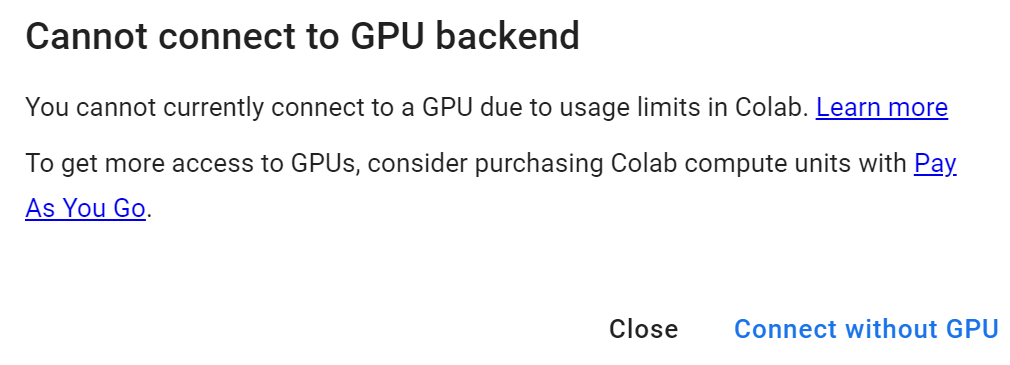